In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from scipy import stats

In [17]:
#read parquets
monthly_cases_summed_df = pd.read_parquet('data/monthly_cases_summed.parquet')
exchange_df = pd.read_parquet('data/exchange.parquet')

#combine dfs with multiindex
our_data = pd.concat([exchange_df, monthly_cases_summed_df], keys=['USD', 'COVID'], axis='columns')
our_data

USD                           COVID                    
               CZ/USD    PL/USD      HU/USD       CZE       POL       HUN
2020-03-01  24.042864  4.013614  312.114545       NaN       NaN       NaN
2020-04-01  25.069682  4.180518  327.990455    3308.0    2311.0       NaN
2020-05-01  25.012381  4.160552  322.363810    4374.0   10566.0    2283.0
2020-06-01  23.706455  3.944050  308.675000    1586.0   10909.0    1101.0
2020-07-01  23.145000  3.886200  306.563913    2686.0   10607.0     279.0
2020-08-01  22.122381  3.720010  294.615714    4620.0   11295.0     350.0
2020-09-01  22.679909  3.792868  305.629091    8044.0   21684.0    1634.0
2020-10-01  23.098409  3.860714  308.284545   46145.0   24142.0   20322.0
2020-11-01  22.357048  3.802343  304.241905  264339.0  271217.0   48860.0
2020-12-01  21.629913  3.681413  295.239130  188196.0  628080.0  141801.0
2021-01-01  21.474714  3.728767  295.048571  195363.0  304067.0  105392.0
2021-02-01  21.388100  3.717550  296.046000  266113.0  218507.0   45072.0
2021-03-01  22.002043  3.863939  307.230870  250706.0  193601.0   61013.0
2021-04-01  21.694591  3.819532  301.943182  296852.0  614731.0  223834.0
2021-05-01  21.043619  3.728548  291.395714   98426.0  470425.0  126915.0
2021-06-01  21.131500  3.736268  290.269545   30514.0   80141.0   25190.0
2021-07-01        NaN       NaN         NaN    6015.0    7629.0    3590.0
2021-08-01        NaN       NaN         NaN    6289.0    3027.0    1363.0

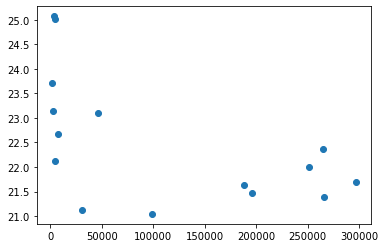

In [8]:
plt.scatter(our_data['summed monthly COVID cases']['CZE'], our_data['local currency to USD']['CZ/USD'])

In [11]:
#plt.scatter(our_data['summed monthly COVID cases']['POL'], our_data['local currency to USD']['PL/USD'])

In [12]:
#plt.scatter(our_data['summed monthly COVID cases']['HUN'], our_data['local currency to USD']['HU/USD'])

In [29]:
#spearmanr(our_data['COVID']['CZE'],our_data['USD']['CZ/USD'])

NameError: name 'info' is not defined

In [21]:
chart = alt.Chart(our_data['USD']).mark_point().encode(y='PL/USD')
chart

alt.Chart(...)

In [2]:
#our_data = pd.read_parquet('data/merged_data.parquet')

In [4]:
#functions to plot data
#get x axes
def get_x_axes(data):
    x = data.index
    return x

#get y axes
def get_y_axes(data, column):
    y = data[f'{column}']
    return y

#plot data
def plot_data(data, y, xticks, ylabel):
    x = get_x_axes(data)
    plt.plot(x, get_y_axes(data, y))# Plot some data on the axes.
    plt.xticks(x[::xticks])
    plt.xlabel('Date')  # Add an x-label to the axes.
    plt.ylabel(f'{ylabel}')  # Add a y-label to the axes.
    plt.title(f'Plotted data from {x[0]} until {x[-1]}')  # Add a title to the axes.
    #plt.legend()  # Add a legend.

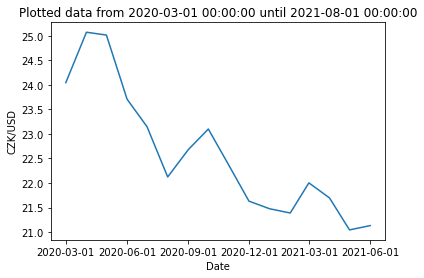

In [16]:
plot_data(our_data['local currency to USD'], 'CZ/USD', 3, 'CZK/USD')

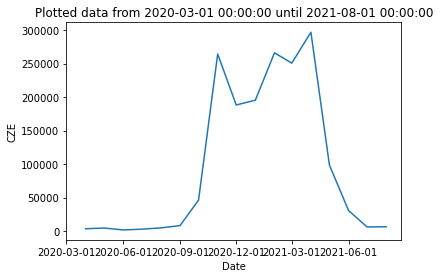

In [17]:
plot_data(our_data['summed monthly COVID cases'], 'CZE', 3, 'CZE')